<a href="https://colab.research.google.com/github/white1107/Math_OCR/blob/main/MOCR_1_S_ECCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pylatex
!sudo apt-get install latexmk
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!apt-get install poppler-utils
!pip install pdf2image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 4.2 MB/s 
  Created wheel for pylatex: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42811 sha256=6633553a33488a8d62a514f0010b686b6e5f86d8455526327063faacf68536c2
  Stored in directory: /root/.cache/pip/wheels/4c/62/73/7688c83647b2103ef0c1b783730c8dc50fbbc3667eea6b1cb8
Successfully built pylatex
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono ghostscript ghostscript-x
  gsfonts gv libcupsfilters1 libcupsimage2 libgirara-gtk3-3 libgs9
  libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6 libmagic-mgc libmagic1
  libnotify4 libpoppler-glib8 libpotrace0 libpt

In [1]:
!mkdir image_file
!mkdir result_file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from PIL import Image 
from pathlib import Path
from pdf2image import convert_from_path
from numpy import asarray
import numpy as np

In [4]:
file_name_ori1 = os.listdir('/content/drive/MyDrive/MOCR/res/single/NeurIPS')
# ls_file_name

In [5]:
file_name_ori2 = os.listdir('/content/drive/MyDrive/MOCR/res/single/ECCV')
# ls_file_name

In [6]:
file_name_save1 = os.listdir('/content/drive/MyDrive/MOCR/res/single_image/NeurIPS')
file_name_save2 = os.listdir('/content/drive/MyDrive/MOCR/res/single_image/ECCV')
# ls_file_name

In [7]:
# #Train D
# ori_path = '/content/drive/MyDrive/MOCR/res/single/NeurIPS'
# save_path = '/content/drive/MyDrive/MOCR/res/single_image/NeurIPS'
# ls_file_name = os.listdir(ori_path)
# # PDFファイルのパス
# page_count = 0
# for i in ls_file_name:
#   pdf_path = Path(ori_path+'/'+i)

#   # PDF -> Image に変換（150dpi）
#   pages = convert_from_path(str(pdf_path), 600)
 
#   # 画像ファイルを１ページずつ保存
#   image_dir = Path(save_path)
#   for i, page in enumerate(pages):

#       file_name = "{:003d}".format(page_count + 1) + ".jpeg"
#       image_path = image_dir / file_name
#       # JPEGで保存
#       page.save(str(image_path), "JPEG")
#       page_count += 1

In [8]:
# #Train D
# ori_path = '/content/drive/MyDrive/MOCR/res/single/ECCV'
# save_path = '/content/drive/MyDrive/MOCR/res/single_image/ECCV'
# ls_file_name = os.listdir(ori_path)
# # PDFファイルのパス
# page_count = 0
# for i in ls_file_name:
#   pdf_path = Path(ori_path+'/'+i)

#   # PDF -> Image に変換（150dpi）
#   pages = convert_from_path(str(pdf_path), 600)

#   # 画像ファイルを１ページずつ保存
#   image_dir = Path(save_path)
#   for i, page in enumerate(pages):

#       file_name = "{:003d}".format(page_count + 1) + ".jpeg"
#       image_path = image_dir / file_name
#       # JPEGで保存
#       page.save(str(image_path), "JPEG")
#       page_count += 1

In [9]:
image_file = Image.open("/content/drive/MyDrive/MOCR/res/single_image/ECCV/003.jpeg") # open colour image
image_file = image_file.convert('L') # convert image to black and white

# アスペクト比を固定して、幅が指定した値になるようリサイズする。
def scale_to_width(img, width):
    height = round(img.height * width / img.width)
    return img.resize((width, height))


dst = scale_to_width(image_file, 30)

In [10]:
dst

In [11]:
def line_seg4(data_image):

# def line2(image_file):  
  data = np.array(data_image)
  original = data.copy()
  data_lined = data.copy()

  ver = []
  zero_ind = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[0])
  t = 0
  for i in range(len(data_lined)):
    score = np.count_nonzero(data_lined[i])
    ver.append(score)
    if score==max_score and f==0:
      zero_ind.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind.append(i-1)
      f = 0

  ver_h = []
  zero_ind_h = []
  tmp_ind = []
  f = 0
  max_score = len(data_lined[:,0])
  t = 0
  for i in range(len(data_lined[0])):
    score = np.count_nonzero(data_lined[:,i])
    ver_h.append(score)
    if score==max_score and f==0:
      zero_ind_h.append(i)
      f = 1
    elif score!=max_score and f==1:
      zero_ind_h.append(i-1)
      f = 0

      
  target = []
  x1 = 0
  x2 = len(data[0])
  for i in zero_ind_h:
    if i == 0 or i == len(data[0]):
      continue
    elif x1==0:
      x1 = i
    else: x2 = i 
  for i,j in zip(zero_ind,zero_ind[1:]):
    if j-i<= 20:continue
    else:target.append([i,j,x1,x2])
  # print(target)


  for i in zero_ind:
    data_lined[i] = 0
  for i in zero_ind_h:
    data_lined[:,i] = 0


  data = data_lined.copy()

  # print(len(target),target)
  for y1,y2,x1,x2 in target:
    x1-=20
    x2+=20
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
        else:
          test_line[:,(j+i)//2] = 0
  # return data



  original = np.array(data_image)
  pil_image = Image.fromarray(data)
  data_image_rgb = pil_image.convert("RGB")
  data = original.copy()
  rgb_data = np.array(data_image_rgb)

  red_target = []
  for y1,y2,x1,x2 in target:
    x1-=20
    x2+=20
    test_line = data[y1:y2,x1:x2]
    ver_h = []
    zero_ind_h = []
    tmp_ind = []
    f = 0
    max_score = len(test_line[:,0])
    freedom =1
    t = 0
    for i in range(len(test_line[0])):
      score = np.count_nonzero(test_line[:,i])
      ver_h.append(score)
      if score>= max_score - freedom  and f==0:
        tmp_ind.append(i)
        f = 1
      elif score < max_score - freedom and f==1:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])
        f = 0
    if f:
        zero_ind_h.append([tmp_ind[-1],i,i-tmp_ind[-1]])

    for i,j,g in zero_ind_h:
      if g > 15:
        if g>= 50:
          test_line[:,i] = 0
          test_line[:,j] = 0
          red_target.append([y1,y2,x1,x2,i])
          red_target.append([y1,y2,x1,x2,j])
        else:
          test_line[:,(j+i)//2] = 0
          red_target.append([y1,y2,x1,x2,(j+i)//2])

  data = original.copy()
  r_data = rgb_data.copy()
  target_dic = []
  for i,j in zip(red_target,red_target[1:]):
    if i[:-1] == j[:-1]:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1]]) < 254: r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[2]+j[-1]])
      # else:r_data[i[0]:i[1],i[2]+i[-1]:i[2]+j[-1],(0,1)] = 0
    else:
      if np.mean(data[i[0]:i[1],i[2]+i[-1]:i[3]]) < 254: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(1,2)] = 0 ; target_dic.append([i[0],i[1],i[2]+i[-1],i[3]])
      # else: r_data[i[0]:i[1],i[2]+i[-1]:i[3],(0,2)] = 0

      if np.mean(data[j[0]:j[1],j[2]:j[2]+j[-1]]) < 254: r_data[j[0]:j[1],j[2]:j[2]+j[-1],(1,2)] = 0 ; target_dic.append([j[0],j[1],j[2],j[2]+j[-1]])
      # else :r_data[j[0]:j[1],j[2]:j[2]+j[-1],(0,2)] = 0

  from collections import defaultdict
  check_dic = []
  d = defaultdict(list)
  b_seg_line = []

  for i in target_dic:
    d[i[0]].append(i)

  for i in d.keys():
    tmp_lis = d[i]
    b_seg_line.append([*tmp_lis[0][:2],tmp_lis[0][2],tmp_lis[-1][-1]])

  data = original.copy()
  r_data = rgb_data.copy()

  for i,j,k,l in b_seg_line:
    r_data[i:j,k:l,(0,2)] = 0



  check_dic = []
  d = defaultdict(list)
  b_seg_line = []

  for i in target_dic:
    d[i[0]].append(i)

  for i in d.keys():
    tmp_lis = d[i]
    b_seg_line.append([*tmp_lis[0][:2],tmp_lis[0][2],tmp_lis[-1][-1]])


  dd = defaultdict(list)
  b_seg_para = []

  before_y = 0
  count_index = 0
  for e,i in enumerate(b_seg_line):
    if i[0]-before_y >=50:
      count_index+=1
    
    dd[count_index].append(i)
    before_y = i[1]
      

  for i in dd.keys():
    tmp_lis = dd[i]
    min_x = float("INF")
    max_x = 0 
    for i in tmp_lis:
      min_x = min(min_x,i[2])
      max_x = max(max_x,i[3])
    b_seg_para.append([tmp_lis[0][0],tmp_lis[-1][1],min_x,max_x])

  data = original.copy()
  r_data = rgb_data.copy()

  for e,(i,j,k,l) in enumerate(b_seg_para):
    if e%2==0 :r_data[i:j,k:l,(0,2)] = 0
    else : r_data[i:j,k:l,(1,2)] = 0

  return r_data

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


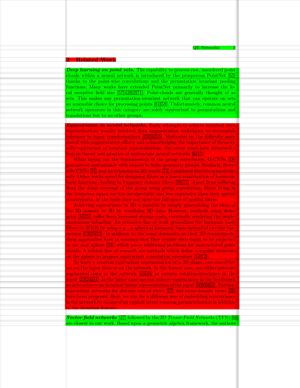

In [12]:
image_file = Image.open("/content/drive/MyDrive/MOCR/res/single_image/ECCV/003.jpeg") # open colour image
image_file = image_file.convert('L') # convert image to black and white

data = line_seg4(image_file)
pil_image = Image.fromarray(data)
pil_image = scale_to_width(pil_image, 300)
pil_image

In [13]:
image_file_array1 = []

for i in range(1,51):
  tmp_image_file = Image.open(f"/content/drive/MyDrive/MOCR/res/single_image/ECCV/{i:03}.jpeg") # open colour image
  tmp_image_file = tmp_image_file.convert('L') # convert image to black and white
  tmp_data = line_seg4(tmp_image_file)
  image_file_array1.append(tmp_data)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
len(image_file_array1)

50

In [15]:
im_rgb_array1=[]
for i in range(len(image_file_array1)//5):
  print(i)
  im_rgb_array1.append(np.concatenate((image_file_array1[i*5:(i+1)*5]),axis = 1))
# im_rgb1 = np.concatenate((image_file_array[0:5]),axis = 1)
# im_rgb2 = np.concatenate((image_file_array[5:10]),axis = 1)
# im_rgb3 = np.concatenate((data7,data8,data9),axis = 1)

im_rgb = np.concatenate((im_rgb_array1))

0
1
2
3
4
5
6
7
8
9


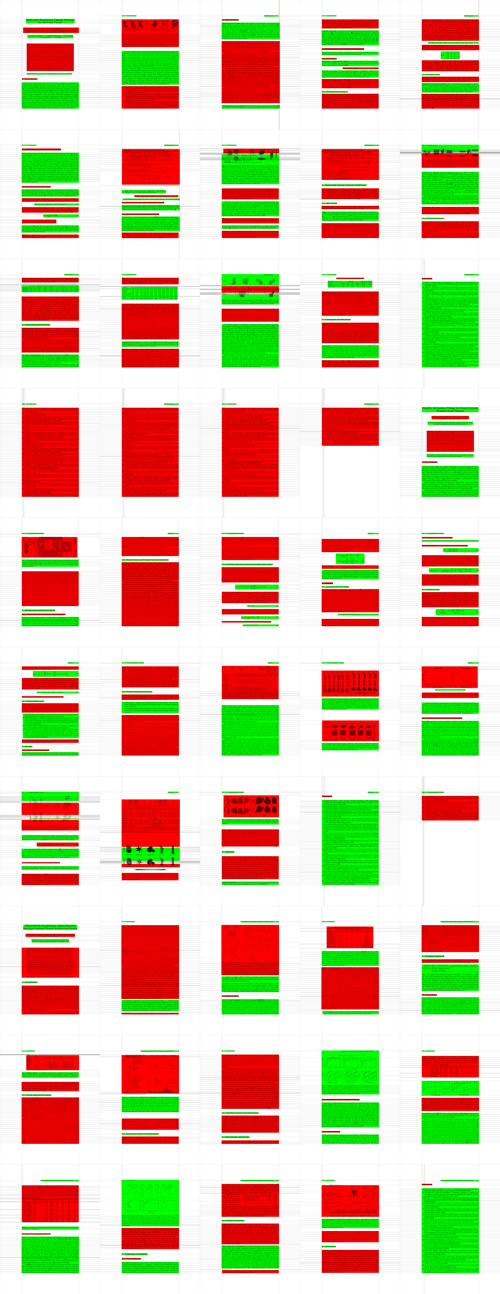

In [16]:
# data4 = line_seg4(image_file2)
pil_image = Image.fromarray(im_rgb)
pil_image = scale_to_width(pil_image, 500)

pil_image

In [17]:
# # data4 = line_seg4(image_file2)
# pil_image = Image.fromarray(image_file_array[40])
# pil_image = scale_to_width(pil_image, 2000)

# pil_image

In [18]:
image_file_array2 = []

for i in range(51,101):
  tmp_image_file = Image.open(f"/content/drive/MyDrive/MOCR/res/single_image/ECCV/{i:03}.jpeg") # open colour image
  tmp_image_file = tmp_image_file.convert('L') # convert image to black and white
  tmp_data = line_seg4(tmp_image_file)
  image_file_array2.append(tmp_data)



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


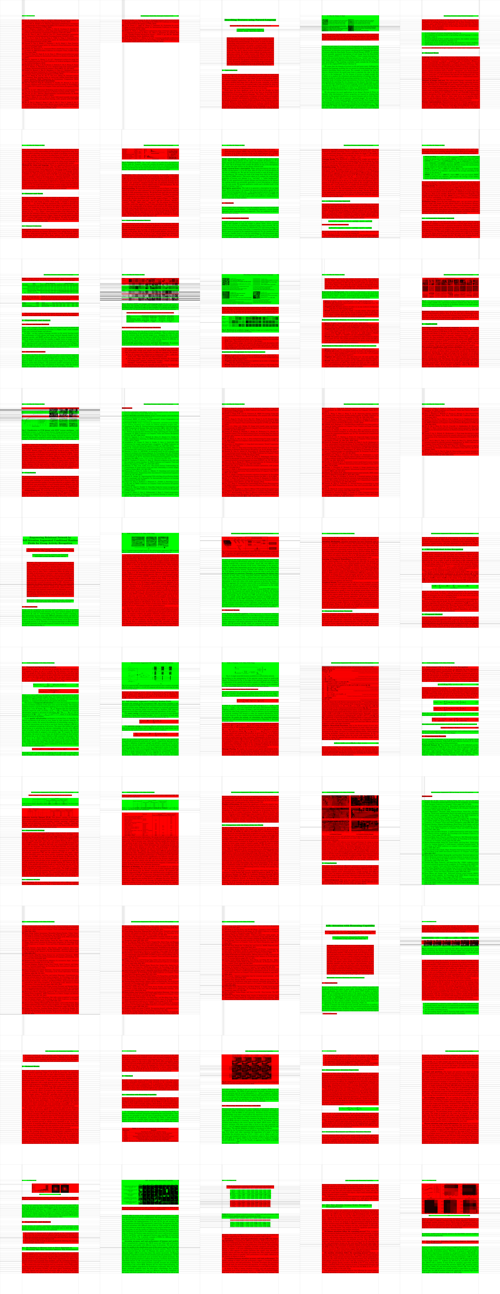

In [19]:
im_rgb_array2=[]
for i in range(len(image_file_array2)//5):
  # print(i)
  im_rgb_array2.append(np.concatenate((image_file_array2[i*5:(i+1)*5]),axis = 1))
# im_rgb1 = np.concatenate((image_file_array[0:5]),axis = 1)
# im_rgb2 = np.concatenate((image_file_array[5:10]),axis = 1)
# im_rgb3 = np.concatenate((data7,data8,data9),axis = 1)

im_rgb = np.concatenate((im_rgb_array2))

pil_image = Image.fromarray(im_rgb)
pil_image = scale_to_width(pil_image, 500)

pil_image



In [20]:
image_file_array3 = []

for i in range(101,151):
  tmp_image_file = Image.open(f"/content/drive/MyDrive/MOCR/res/single_image/ECCV/{i:03}.jpeg") # open colour image
  tmp_image_file = tmp_image_file.convert('L') # convert image to black and white
  tmp_data = line_seg4(tmp_image_file)
  image_file_array3.append(tmp_data)




/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


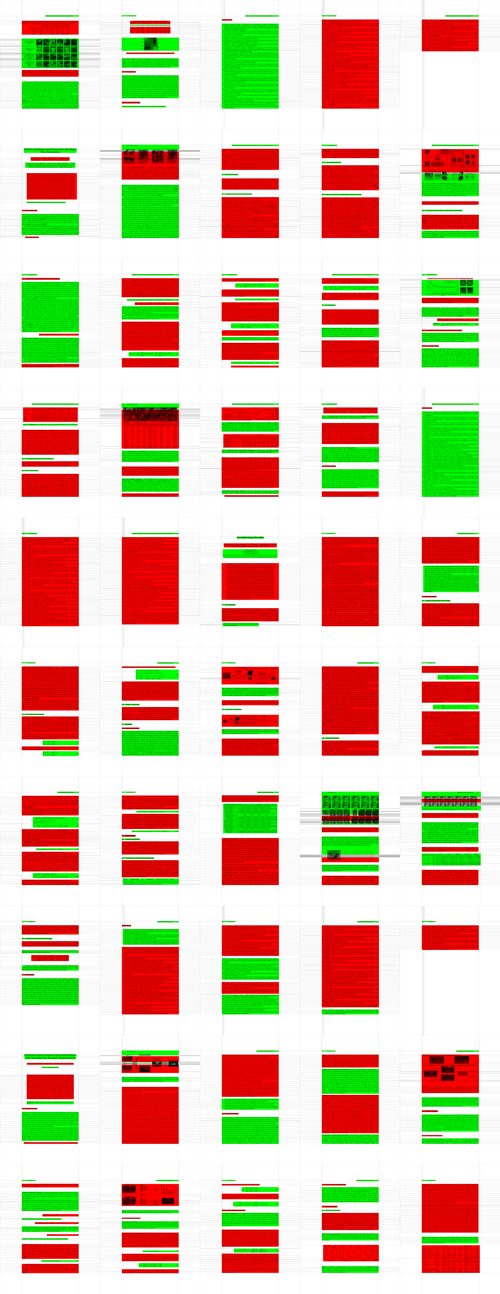

In [21]:

im_rgb_array3=[]
for i in range(len(image_file_array3)//5):
  # print(i)
  im_rgb_array3.append(np.concatenate((image_file_array3[i*5:(i+1)*5]),axis = 1))
# im_rgb1 = np.concatenate((image_file_array[0:5]),axis = 1)
# im_rgb2 = np.concatenate((image_file_array[5:10]),axis = 1)
# im_rgb3 = np.concatenate((data7,data8,data9),axis = 1)

im_rgb = np.concatenate((im_rgb_array3))

pil_image = Image.fromarray(im_rgb)
pil_image = scale_to_width(pil_image, 500)

pil_image


In [22]:
tmp = "2 8 10 13 15 16 17 18 19 24 31 32 34 35 38 40 44 45 46 47 50"
w = list(map(int,tmp.split()))

checked1 = []
for i in range(50):
  if i+1 not in w:checked1.append(i)
print(len(checked1))

29


In [23]:
tmp = "2 3 4 5 7 10 15 17 20 21 22 23 24 26 29 30 31 33 34 35 37 38 39 40 43 45"
w = list(map(int,tmp.split()))

checked2 = []
for i in range(50):
  if i+1 not in w:checked2.append(i+50)
print(len(checked2))

24


In [24]:
tmp = "2 4 5 6 7 8 15 16 17 18 19 23 24 25 46 47 48 "
w = list(map(int,tmp.split()))

checked3 = []
for i in range(50):
  if i+1 not in w:checked3.append(i+100)
print(len(checked3))

33


In [ ]:
image_file_array = image_file_array1+image_file_array2+image_file_array3
# for i in  checked1+checked2+checked3:
#   i+=1
#   tmp_image_file = Image.open(f"/content/drive/MyDrive/MOCR/res/single_image/NeurIPS/{i:03}.jpeg") # open colour image
#   tmp_image_file = tmp_image_file.convert('L') # convert image to black and white
#   tmp_data = line_seg4(tmp_image_file)
#   image_file_array.append(tmp_data)


im_rgb_array=[]
for i in range(len(image_file_array)//9):
  # i+=1
  # print(i)
  im_rgb_array.append(np.concatenate((image_file_array[i*9:(i+1)*9]),axis = 1))
# im_rgb1 = np.concatenate((image_file_array[0:5]),axis = 1)
# im_rgb2 = np.concatenate((image_file_array[5:10]),axis = 1)
# im_rgb3 = np.concatenate((data7,data8,data9),axis = 1)

im_rgb = np.concatenate((im_rgb_array))

# data4 = line_seg4(image_file2)
pil_image = Image.fromarray(im_rgb)
pil_image = scale_to_width(pil_image, 1000)

pil_image